In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [43]:
midsummers = pd.read_csv("midsummers_ts.csv")
predicted = pd.read_csv("prediction.csv")

In [139]:
midsummers.date = midsummers.date.apply(pd.to_datetime)
midsummers["year"] = midsummers.date.apply(lambda date: date.year)
midsummers["datetime"] = midsummers.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)

predicted.date = predicted.date.apply(pd.to_datetime)
predicted["year"] = predicted.date.apply(lambda date: date.year)
predicted["datetime"] = predicted.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)

combined = pd.concat([midsummers, predicted])

combined["weekday"] = combined.date.apply(lambda date: date.weekday())
combined = combined[(combined.weekday >= 3) & (combined.weekday <= 6) & (combined.year >= 2017)]
combined = combined.iloc[::2, :]

In [140]:
combined.tail()

,date,hour,LAM Station,Cars and Vans - 1,Cars and Vans - 2,Trucks - 1,Trucks - 2,Buses - 1,Buses - 2,datetime,year,weekday
590,2018-06-24,14-15,Mäntsälä,504.5,2576.4,2.8,17.0,3.4,7.6,2018-06-24 14:00:00,2018,6
592,2018-06-24,16-17,Mäntsälä,490.8,2577.6,7.0,15.3,6.0,6.1,2018-06-24 16:00:00,2018,6
594,2018-06-24,18-19,Mäntsälä,463.7,2663.5,5.1,11.7,4.7,6.1,2018-06-24 18:00:00,2018,6
596,2018-06-24,20-21,Mäntsälä,318.1,2277.5,6.4,16.0,3.9,4.2,2018-06-24 20:00:00,2018,6
598,2018-06-24,22-23,Mäntsälä,173.2,1445.6,7.4,12.8,2.6,2.7,2018-06-24 22:00:00,2018,6


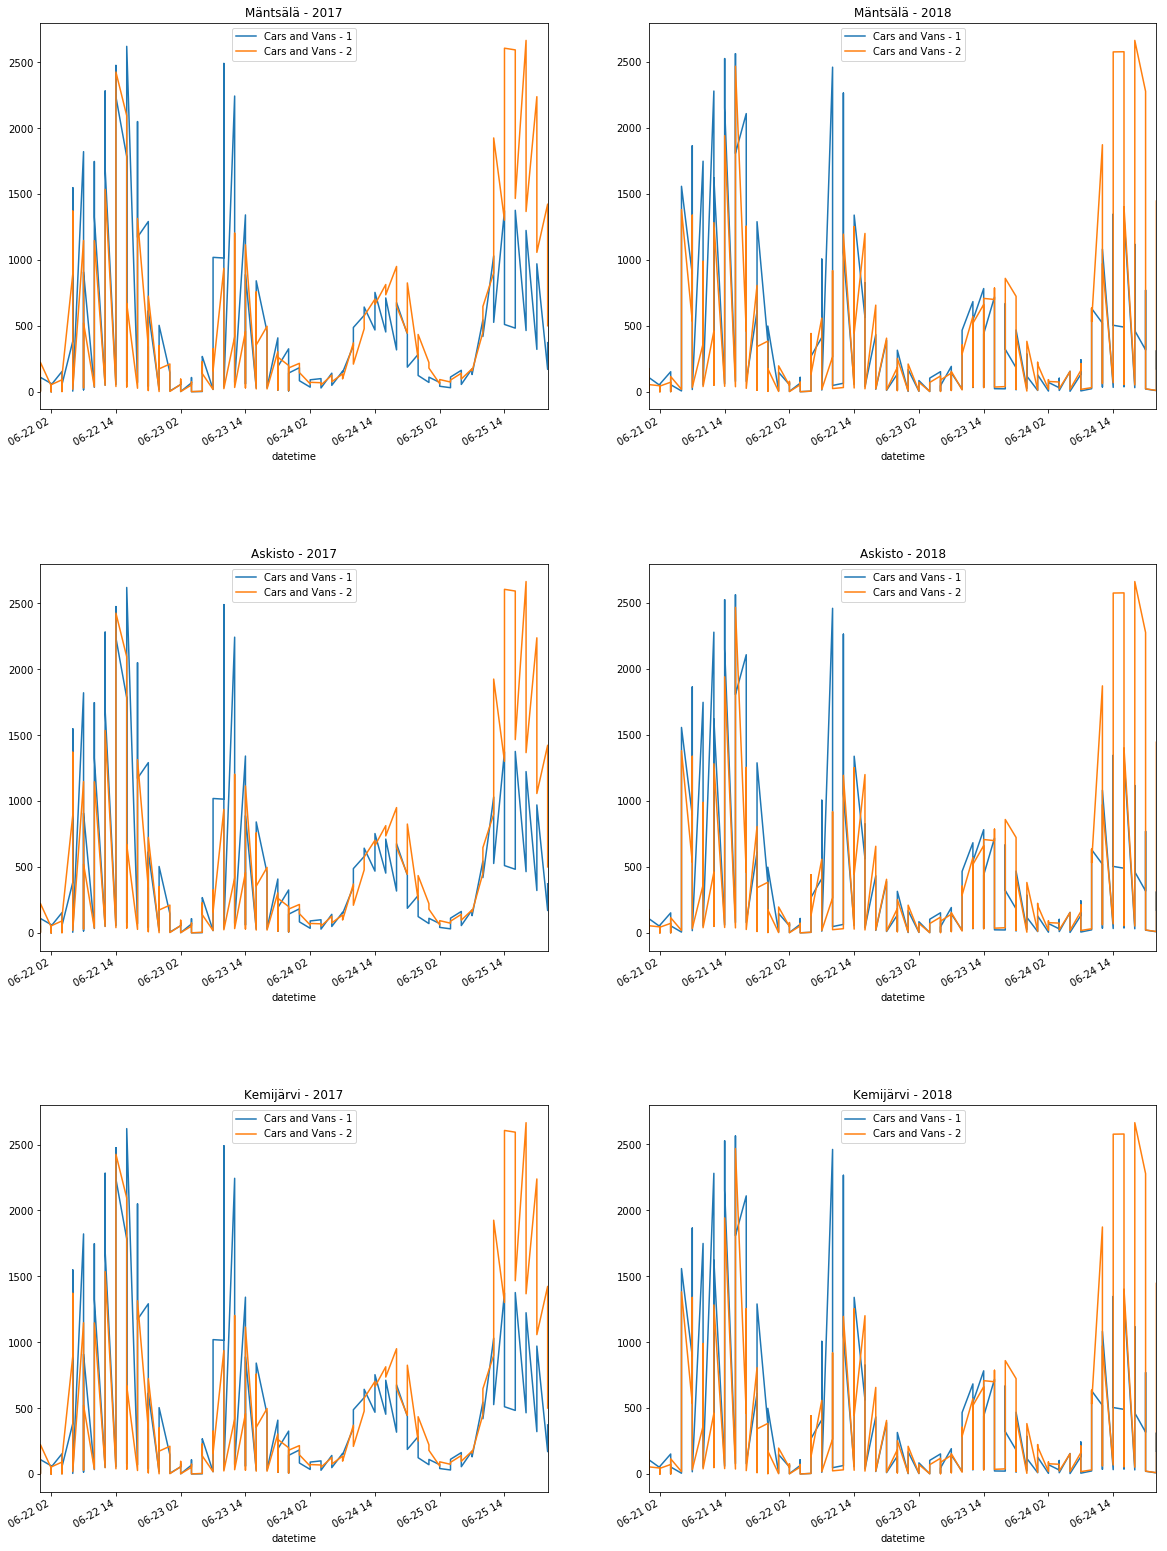

In [141]:
years = combined.year.unique()
locations = combined["LAM Station"].unique()

fig, ax = plt.subplots(nrows=len(locations), ncols=len(years), figsize=(20, 30))
plt.subplots_adjust(hspace = 0.4)

i = 0
for year in years:
    j = 0
    for location in locations:
        axis = ax[j][i]
        axis.set_title(location + " - {}".format(year))
        combined[combined.year == year][["datetime", "Cars and Vans - 1", "Cars and Vans - 2"]].plot(x="datetime", ax=axis)
        j += 1
    i += 1